## ANLP Assignment 2: Natural Language Generation Code
### Christopher Hamilton,  a1766121

In [1]:
import json
import os

import pandas as pd
import numpy as np

### 1. Reading dataset and initial pre-processing

In [2]:
def read_json_to_df(file_name):
    data = []
    with open(file_name) as data_file:
        for line in data_file:
            # Load each line of the JSON file as a dictionary
            data.append(json.loads(line))

    # Form a Pandas DataFrame from the dictionaries
    return pd.json_normalize(data)

# Load the training and test data
raw_train_df = read_json_to_df("hotel_reviews_train.json")
raw_test_df = read_json_to_df("hotel_reviews_test.json")

In [3]:
# Print out the initially loaded dataframes
raw_train_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_reviews,author.id,author.location,author.num_cities,author.num_helpful_votes,author.num_type_reviews,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“Horrible experience”,First of all we got there and they didn't have...,September 2012,80138,0,"September 19, 2012",140716137,False,1.0,2.0,...,1.0,Kh3RD,1.0,AB404BB664D653ECF79DE0E0867F6D34,"Las Vegas, Nevada",NaN,NaN,NaN,NaN,NaN
1,“Stay Away”,Found Racist graffiti in the room. Request to ...,June 2011,240151,1,"June 27, 2011",114807323,False,1.0,1.0,...,NaN,TheUglyPhotographer,4.0,BB116F87FE8F9AB356F63853BFD32FFE,"Oceanside, California",3.0,4.0,4.0,NaN,NaN
2,“Great location and service”,Close to Union Square - hotel is a bit of a ma...,October 2010,80793,0,"October 25, 2010",84805430,False,4.0,5.0,...,4.0,Moonstonemoclips,48.0,F3D0CF371B788300E73A1413B2DABB4B,Kirkland,31.0,27.0,32.0,NaN,NaN
3,“I will never go back here again!”,I had a bad vibe about this place from the mom...,June 2012,111418,1,"June 28, 2012",132971117,False,3.0,2.0,...,1.0,JoanellenJ,22.0,BC6BC07F81B768F78B6CE17A18762C11,New York,10.0,9.0,5.0,NaN,NaN
4,“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...",January 2012,671150,3,"February 4, 2012",124104157,False,NaN,NaN,...,NaN,Lynnworks,3.0,F7E9D044FA2554FD06A871289312E043,Providence,3.0,7.0,3.0,NaN,NaN


In [4]:
raw_test_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_cities,author.num_helpful_votes,author.num_reviews,author.num_type_reviews,author.id,author.location,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“I was SO surprised! I WILL return!”,My husband and I just celebrated our 25th wedd...,November 2011,1783324,1,"November 26, 2011",121063682,False,5.0,5.0,...,5.0,shooflyfarm,15.0,12.0,30.0,11.0,02C39D355EE31BFA82F2724523782A92,"Opelika, Alabama",NaN,NaN
1,“A Mother/Daughter vacation”,I could not leave a bad comment on any part of...,August 2011,88458,0,"August 10, 2011",116545869,False,5.0,5.0,...,NaN,bestmpm,NaN,NaN,1.0,NaN,8F37B44FE89FD626313A7CB4B381FE40,Chattanooga,NaN,NaN
2,“Good Choice for Pre-cruise”,I spent one night at this hotel prior to a cru...,November 2010,82868,0,"December 6, 2010",89196759,False,5.0,5.0,...,5.0,Conner2dood,20.0,39.0,26.0,24.0,5E57B2B21C69F07E617D67C748DF010A,Pennsylvania,NaN,NaN
3,“Unsung Hero”,"For the past year and a half, my daughter has ...",July 2011,98979,0,"July 28, 2011",115879719,False,5.0,5.0,...,NaN,LeviK,2.0,NaN,2.0,NaN,D7E5C22B3A877DEA1434B18E797FEE19,,NaN,NaN
4,"“Great Value for a King, Queen, and Princesses.”","Great Value for a King, Queen, and Princesses....",March 2007,112273,8,"March 21, 2007",7198417,False,5.0,5.0,...,5.0,thomrho,13.0,25.0,27.0,4.0,EEE6C615C8EBCA4AFD2774810E590274,"albuquerque, nm",5.0,5.0


In [10]:
ratings_columns = [col for col in raw_train_df.columns if col.startswith("ratings.")]

# Select the title, text and overall rating columns to make a new dataframe
train_df = raw_train_df[["title", "text"] + ratings_columns]
test_df = raw_test_df[["title", "text"] + ratings_columns]

# Check the value counts for the ratings
for dataset in [train_df, test_df]:
    for column in ratings_columns:
        print(dataset[column].value_counts())
        print()

    print()

ratings.service
5.0    11130
4.0     5289
3.0     2677
1.0     1341
2.0     1113
Name: count, dtype: int64

ratings.cleanliness
5.0    11814
4.0     5560
3.0     2373
2.0      901
1.0      897
Name: count, dtype: int64

ratings.overall
5.0    9825
4.0    7720
3.0    3287
2.0    1611
1.0    1557
Name: count, dtype: int64

ratings.value
5.0    8828
4.0    6312
3.0    3603
2.0    1420
1.0    1384
Name: count, dtype: int64

ratings.location
5.0    11743
4.0     4523
3.0     1875
2.0      504
1.0      338
Name: count, dtype: int64

ratings.sleep_quality
5.0    7167
4.0    3898
3.0    1811
1.0     671
2.0     638
Name: count, dtype: int64

ratings.rooms
5.0    8116
4.0    6142
3.0    3330
2.0    1316
1.0    1096
Name: count, dtype: int64

ratings.check_in_front_desk
5.0    1323
4.0     694
3.0     486
2.0     221
1.0     185
Name: count, dtype: int64

ratings.business_service_(e_g_internet_access)
5.0    643
3.0    503
4.0    491
2.0    164
1.0    158
Name: count, dtype: int64


ratings.serv

In [11]:
# Find indices of rows where the rating is 0
zero_rating_indices = test_df[test_df['ratings.overall'] == 0].index
for index in zero_rating_indices:
    # Print the text corresponding to the zero rating
    print(test_df['text'][index])

Best location. Right where Pier 39 is. Lots of things to do around the area, restaurants and sight seeing. Staff are friendly. Great service. Will come back again :)


In [12]:
# Based on the above text, it is unlikely the reviewer meant to give a low rating
# Instead, we will remvoe the 0 from the dataset
test_df = test_df.drop(zero_rating_indices)

In [13]:
# Check the value counts for the ratings after the 0 rating has been removed
print("Test data ratings")
print(test_df["ratings.overall"].value_counts())

Test data ratings
ratings.overall
5.0    2468
4.0    1933
3.0     793
2.0     420
1.0     385
Name: count, dtype: int64


Python's lambda functions can be used to remove the special characters from the dataset. Pandas DataFrames columns include an `apply` method that can take in a lambda function to apply to each cell in the column. By including a lambda function that will only include characters which are alphanumeric or spaces, the special characters can be removed from the dataset (Saturn Cloud 2024).

At the same time, we can apply the `lower()` function on each character to convert all the text to lowercase. This can be seen by viewing the first few rows with the `head()` function on the DataFrames.

In [14]:
# Remove remove non-alphanumeric characters from the title and text columns
train_df.loc[:, 'title'] = train_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
train_df.loc[:, 'text'] = train_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

test_df.loc[:, 'title'] = test_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
test_df.loc[:, 'text'] = test_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

In [15]:
train_df.head()

,title,text,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,horrible experience,first of all we got there and they didnt have ...,1.0,2.0,1.0,1.0,3.0,2.0,1.0,NaN,NaN
1,stay away,found racist graffiti in the room request to c...,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN
2,great location and service,close to union square hotel is a bit of a maz...,4.0,5.0,4.0,3.0,5.0,4.0,4.0,NaN,NaN
3,i will never go back here again,i had a bad vibe about this place from the mom...,3.0,2.0,2.0,1.0,4.0,1.0,1.0,NaN,NaN
4,ripped off our visa card after departure,after we received our final bill and left the ...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
test_df.head()

,title,text,ratings.service,ratings.cleanliness,ratings.overall,ratings.value,ratings.location,ratings.sleep_quality,ratings.rooms,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,i was so surprised i will return,my husband and i just celebrated our 25th wedd...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
1,a motherdaughter vacation,i could not leave a bad comment on any part of...,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN
2,good choice for precruise,i spent one night at this hotel prior to a cru...,5.0,5.0,4.0,5.0,4.0,5.0,5.0,NaN,NaN
3,unsung hero,for the past year and a half my daughter has b...,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN
4,great value for a king queen and princesses,great value for a king queen and princesses we...,5.0,5.0,5.0,5.0,4.0,NaN,5.0,5.0,5.0


The provided code for the `language_filter.py` file includes an example of using the `langdetect` Python package to filter for only English text. Rather than applying the filter for only English reviews when reading the file, we can apply the filter on the loaded DataFrames using a similar method to above. By using the Pandas `apply` method on the text and title columns, the returned DataFrame will only include rows where both the title and text are in English as determined by the `langdetect` package.

In [17]:
from langdetect import detect as detect_language

def filter_english_reviews(df):
    def is_english(text):
        try:
            return detect_language(text) == "en"
        except:
            return False

    # Filter the DataFrame for reviews where both title and text are in English
    return df[df['text'].apply(is_english) & df['title'].apply(is_english)]

Since the language detecting process takes some time over the whole dataset, to save time during development, the filtered DataFrames can be saved and loaded from CSV. Since these DataFrames will not change, and all preprocessing steps are the same, running the language filter each time is not necessary. I have written some quick checks to see if the files have already been saved, and if they have load them, otherwise run the language check code and save the files for later.

In [18]:
# Save the English reviews to a CSV file to save time filtering when running again (NumFOCUS, Inc. 2024)
if os.path.exists("english_hotel_reviews_train.csv"):
    train_df = pd.read_csv("english_hotel_reviews_train.csv")
else:
    train_df = filter_english_reviews(train_df)
    train_df.to_csv("english_hotel_reviews_train.csv", index=False)

if os.path.exists("english_hotel_reviews_test.csv"):
    test_df = pd.read_csv("english_hotel_reviews_test.csv")
else:
    test_df = filter_english_reviews(test_df)
    test_df.to_csv("english_hotel_reviews_test.csv", index=False)

In [19]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18115 entries, 2 to 23999
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           18115 non-null  object 
 1   text                                            18115 non-null  object 
 2   ratings.service                                 16337 non-null  float64
 3   ratings.cleanliness                             16311 non-null  float64
 4   ratings.overall                                 18115 non-null  float64
 5   ratings.value                                   16307 non-null  float64
 6   ratings.location                                14326 non-null  float64
 7   ratings.sleep_quality                           10798 non-null  float64
 8   ratings.rooms                                   15098 non-null  float64
 9   ratings.check_in_front_desk                 

In [20]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4528 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           4528 non-null   object 
 1   text                                            4528 non-null   object 
 2   ratings.service                                 4068 non-null   float64
 3   ratings.cleanliness                             4076 non-null   float64
 4   ratings.overall                                 4528 non-null   float64
 5   ratings.value                                   4066 non-null   float64
 6   ratings.location                                3548 non-null   float64
 7   ratings.sleep_quality                           2667 non-null   float64
 8   ratings.rooms                                   3724 non-null   float64
 9   ratings.check_in_front_desk                   

### 2. Exploratory Data Analysis (EDA)

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/dev/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/dev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
print(ratings_columns)

['ratings.service', 'ratings.cleanliness', 'ratings.overall', 'ratings.value', 'ratings.location', 'ratings.sleep_quality', 'ratings.rooms', 'ratings.check_in_front_desk', 'ratings.business_service_(e_g_internet_access)']


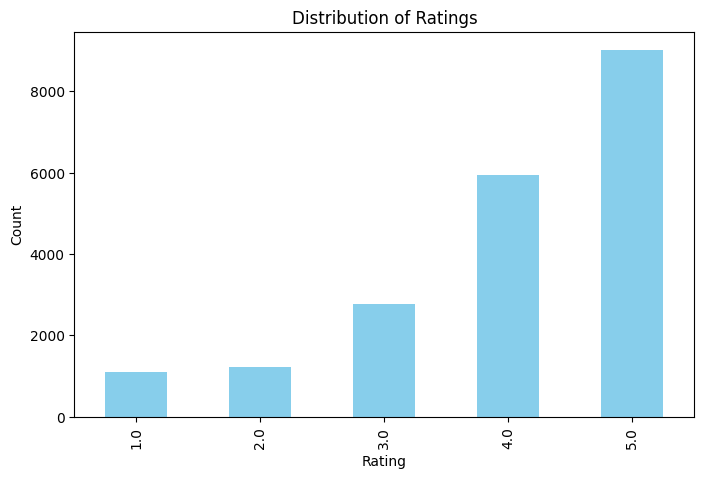

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of ratings
for column in ratings_columns:
    train_df[column].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='skyblue')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

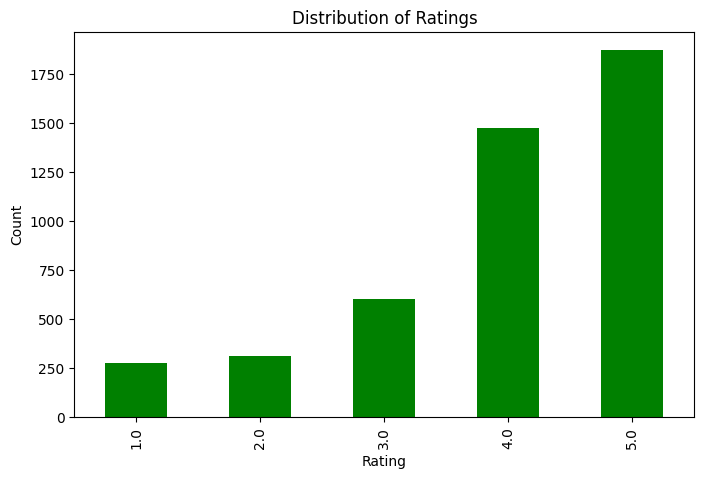

In [23]:
import matplotlib.pyplot as plt

# Plot distribution of ratings
test_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='green')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()